# Project - PropertyInspection - Dhaval Parikh - dhp6106@gmail.com - Term 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import time

In [2]:
data = pd.read_csv('PropertyInspection_train.csv')
data.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,...,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,...,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,...,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,...,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,...,1,22,1,2,7,N,N,E,1,1


In [3]:
print(np.sort(data["Hazard"].unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 46 49 51 52 63
 64 69]


In [4]:
data.shape

(50999, 34)

In [5]:
data.drop(labels=['Id'],axis=1,inplace=True)

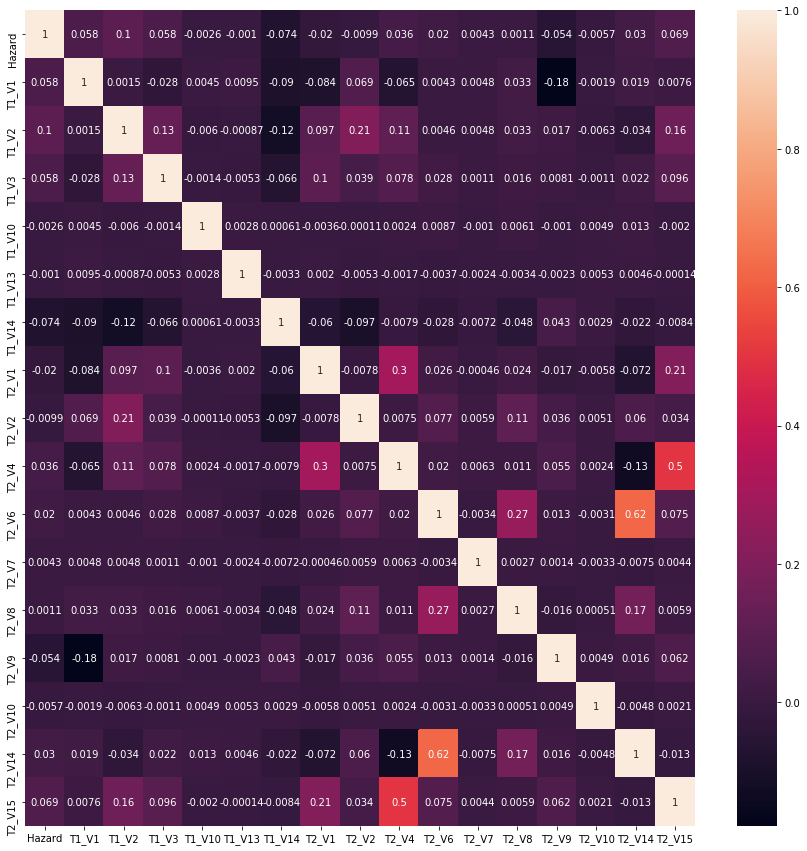

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),yticklabels=True,cbar=True,linewidths=0,annot=True)

plt.show()

All variables have very low corrlation thus do not need to do feature prunning. 

In [7]:
print(list(data.groupby('T1_V1')['Hazard'].mean().index))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


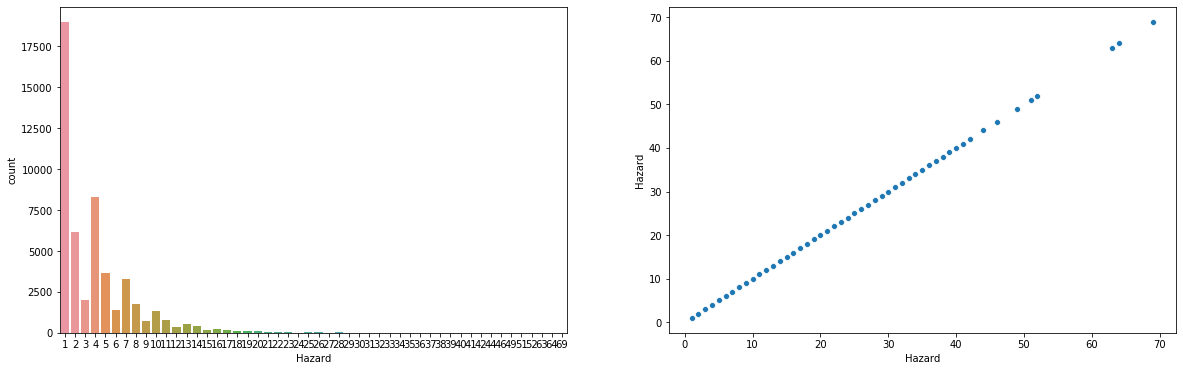

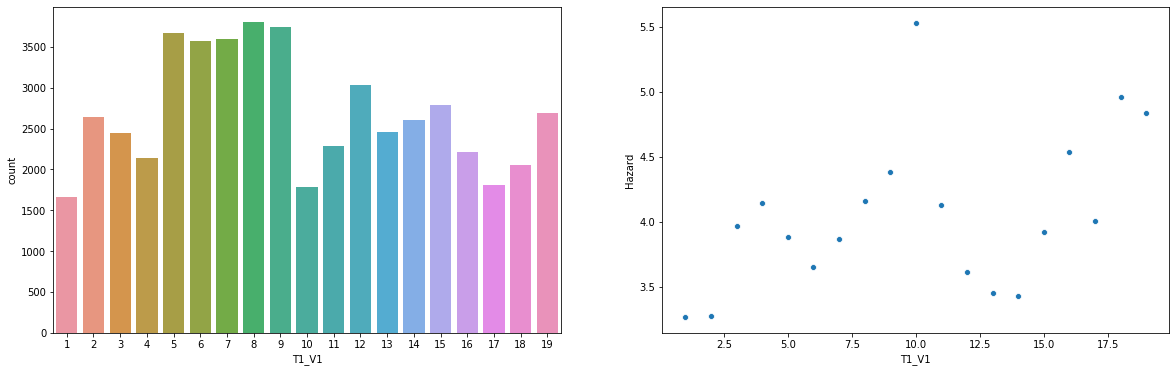

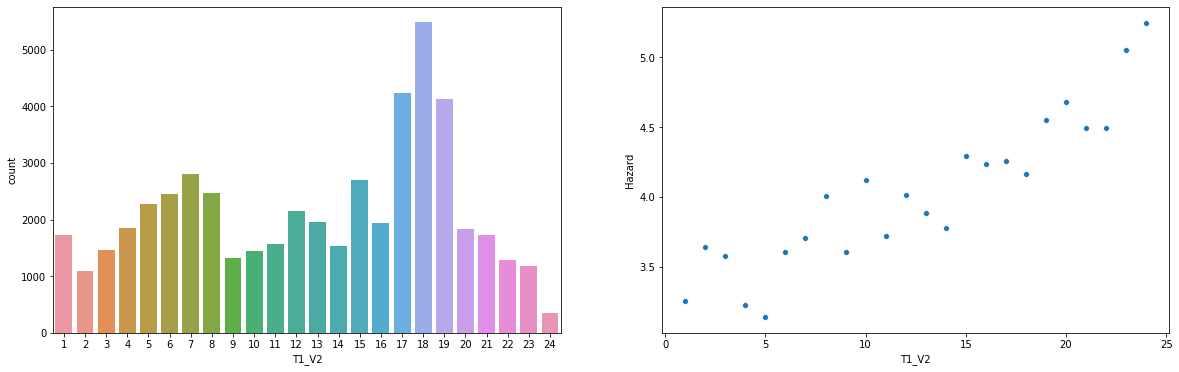

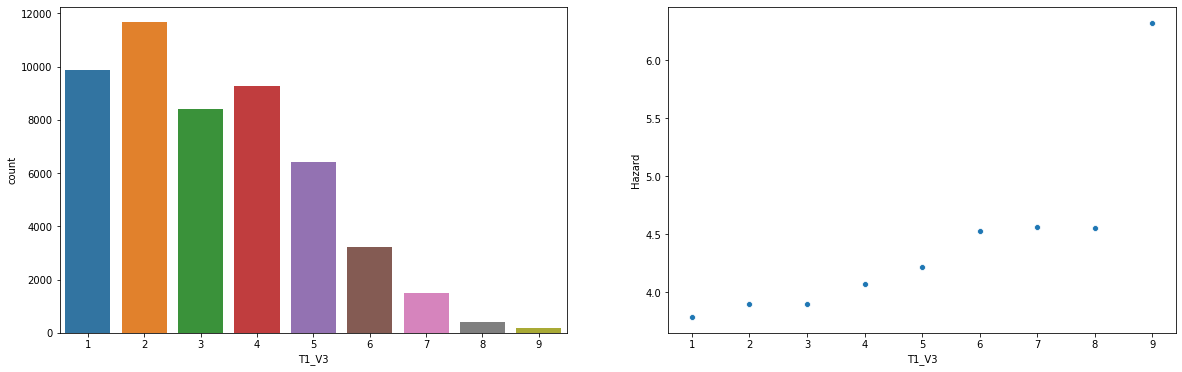

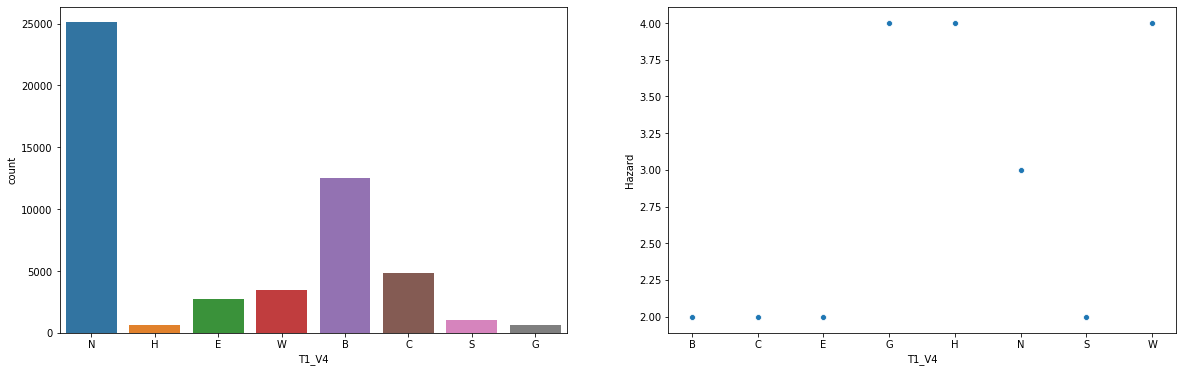

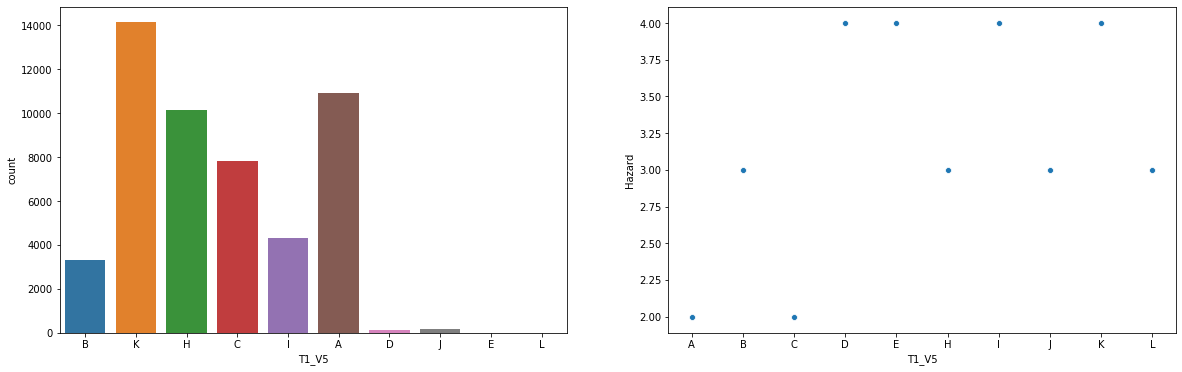

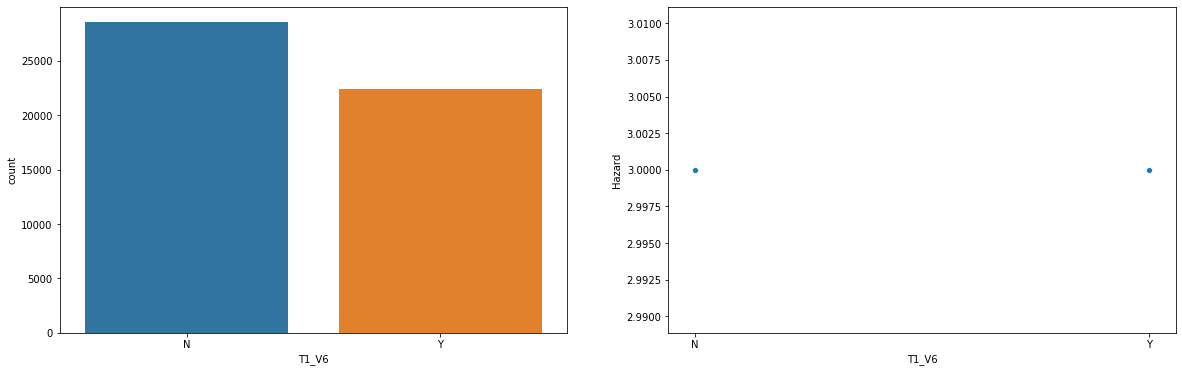

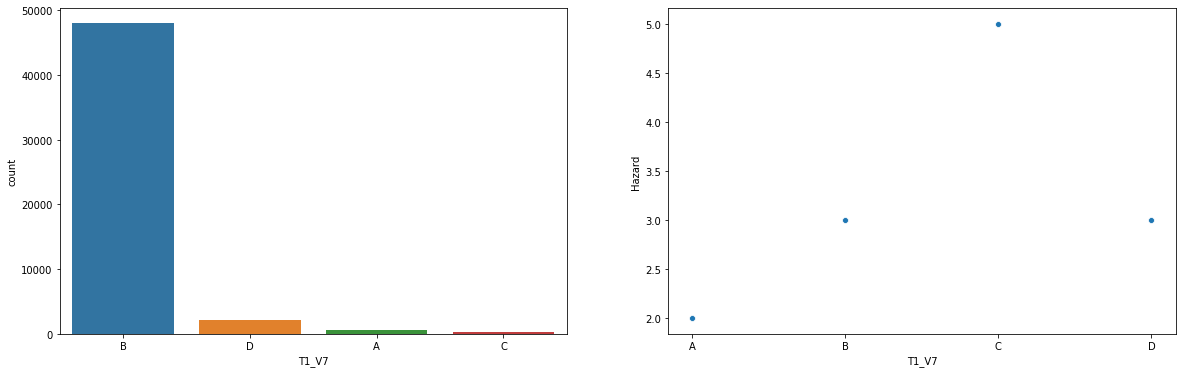

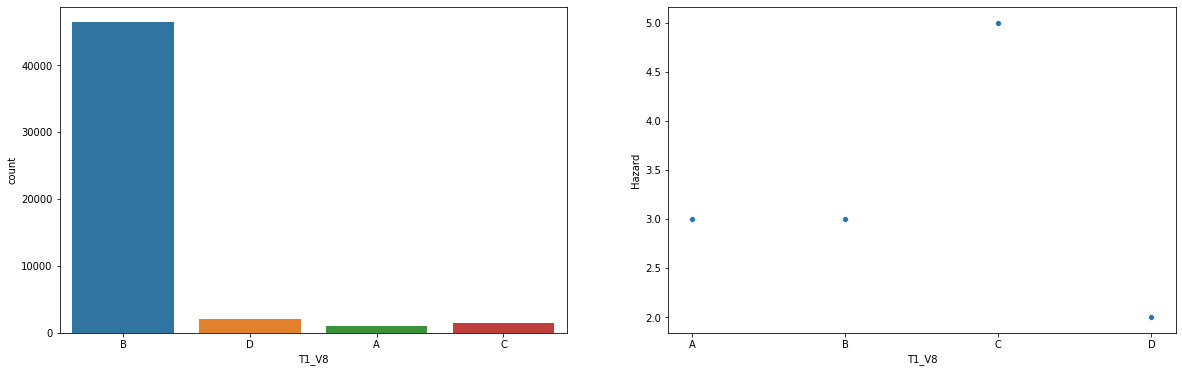

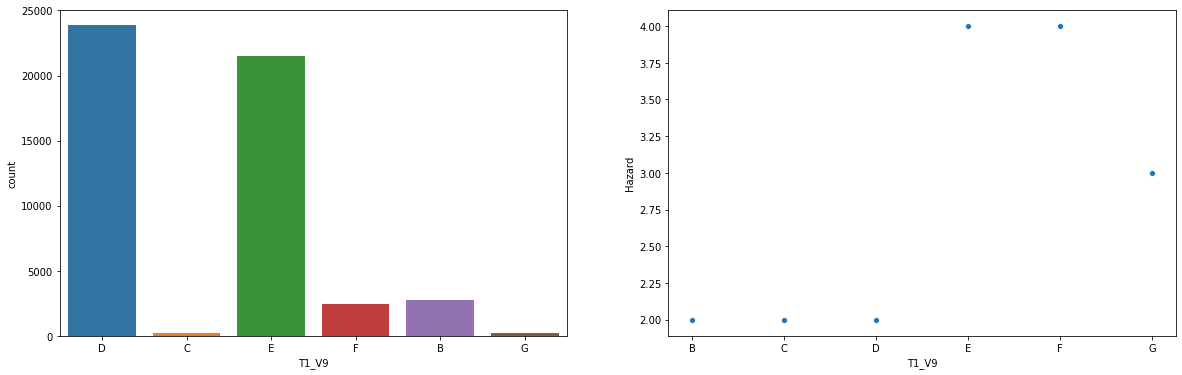

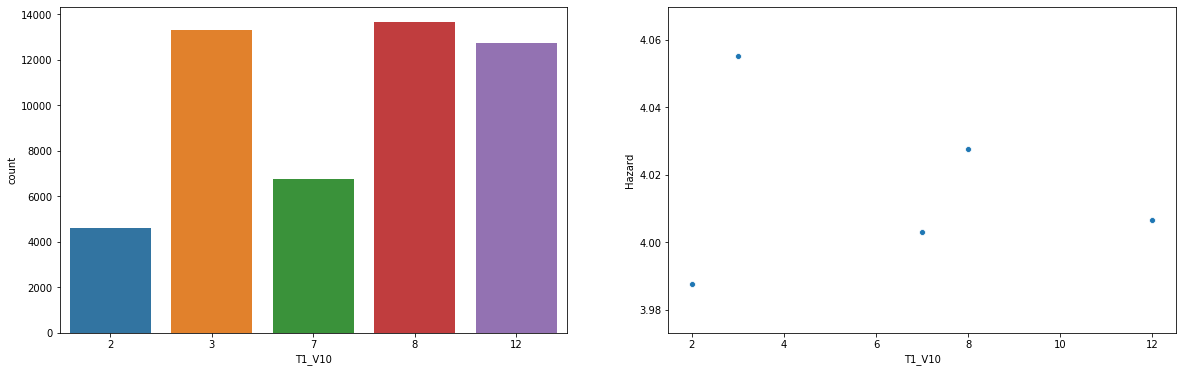

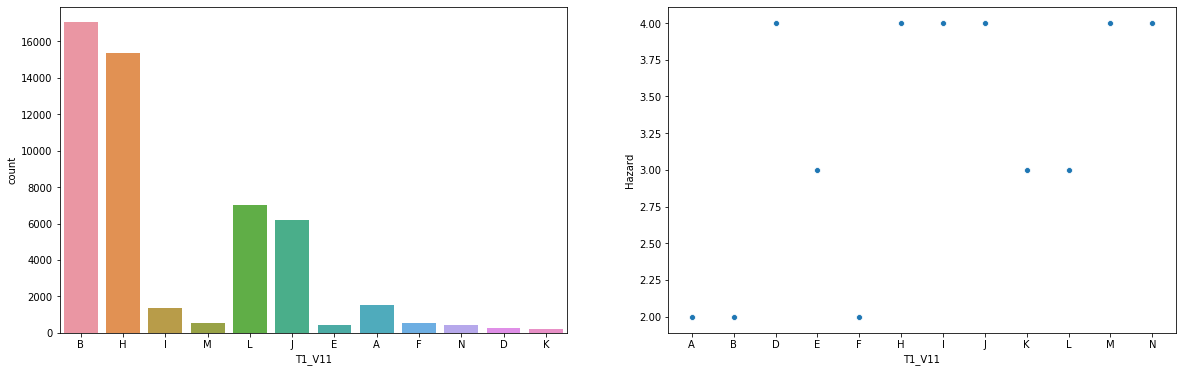

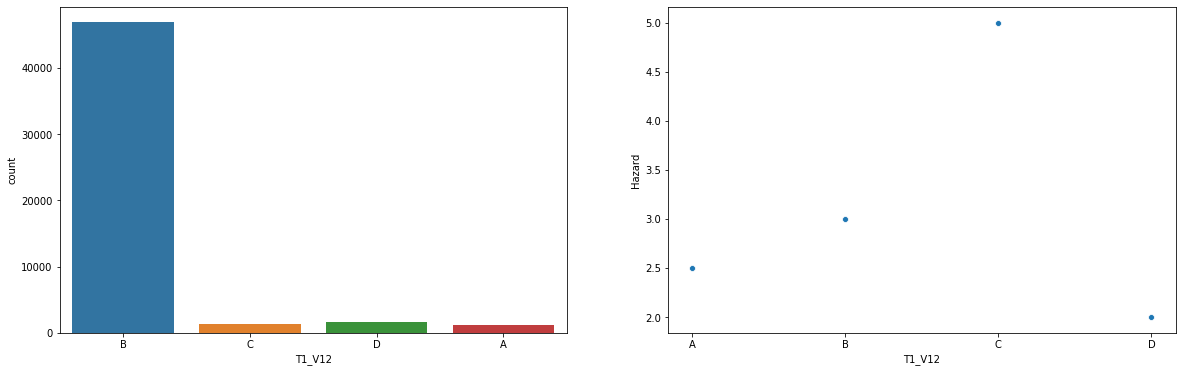

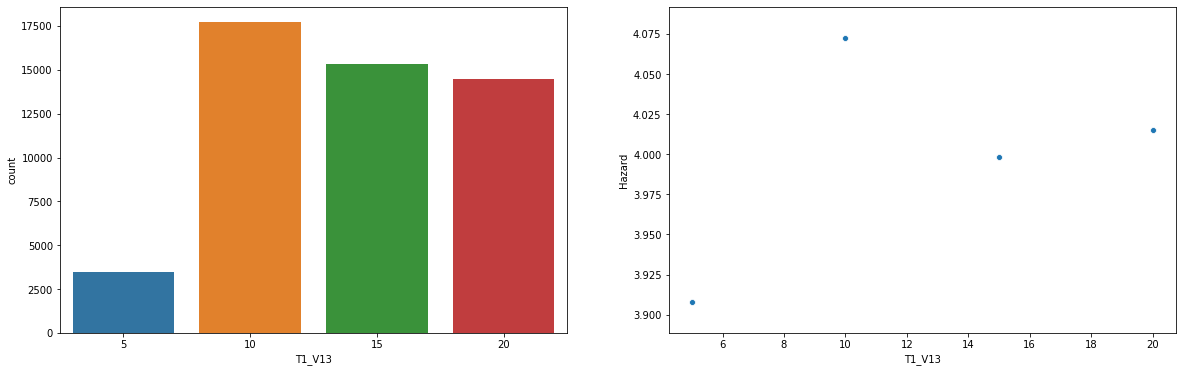

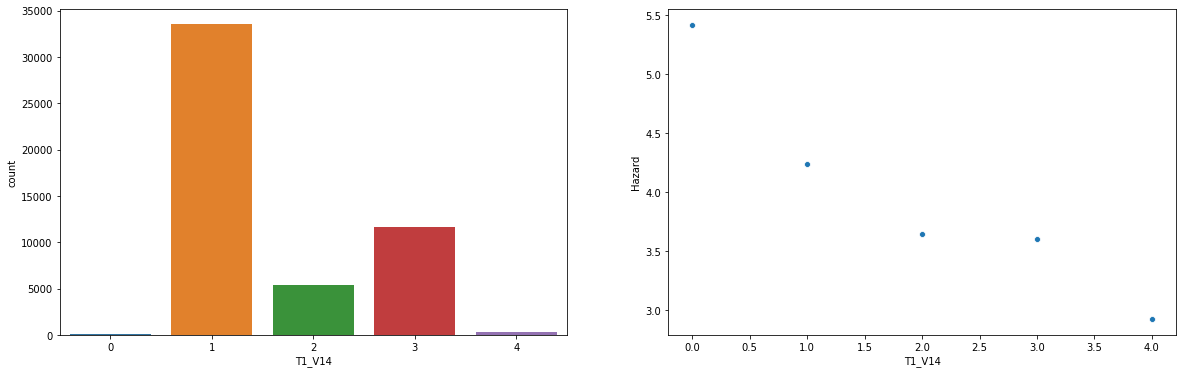

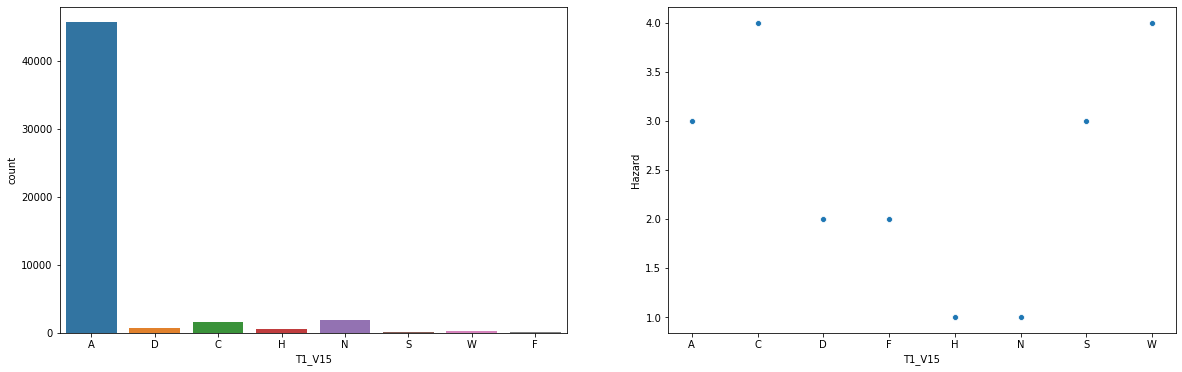

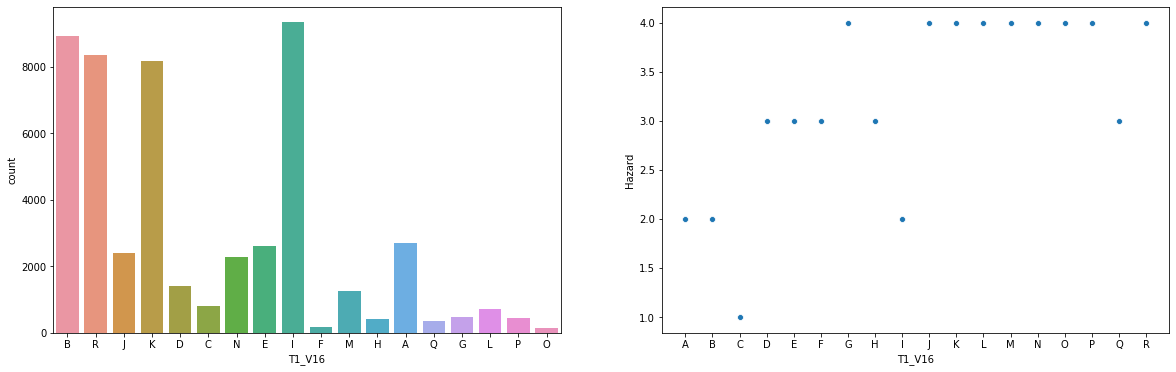

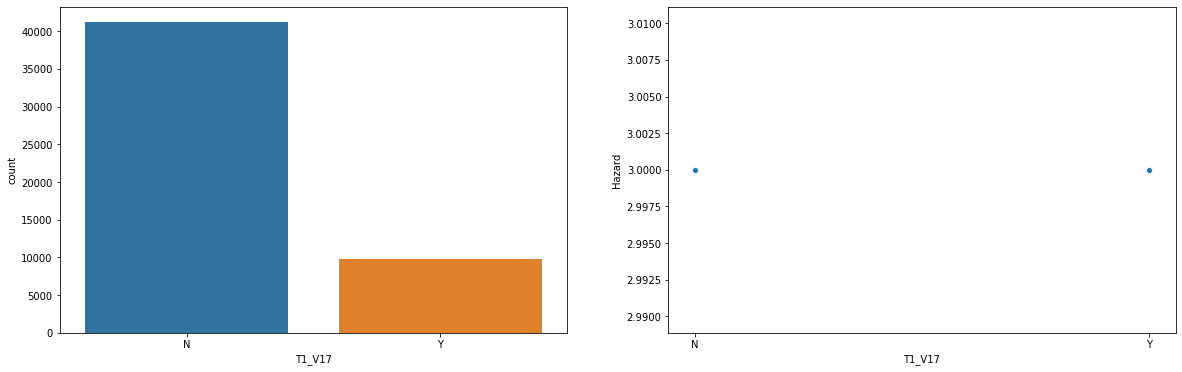

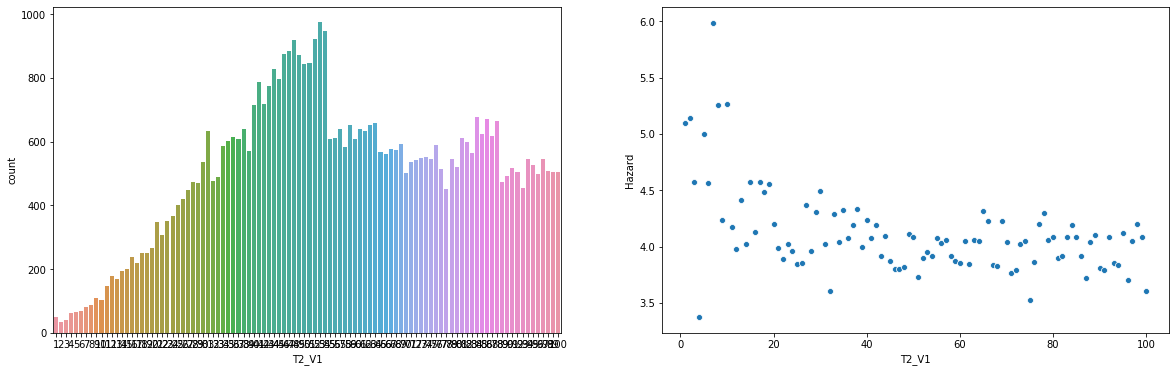

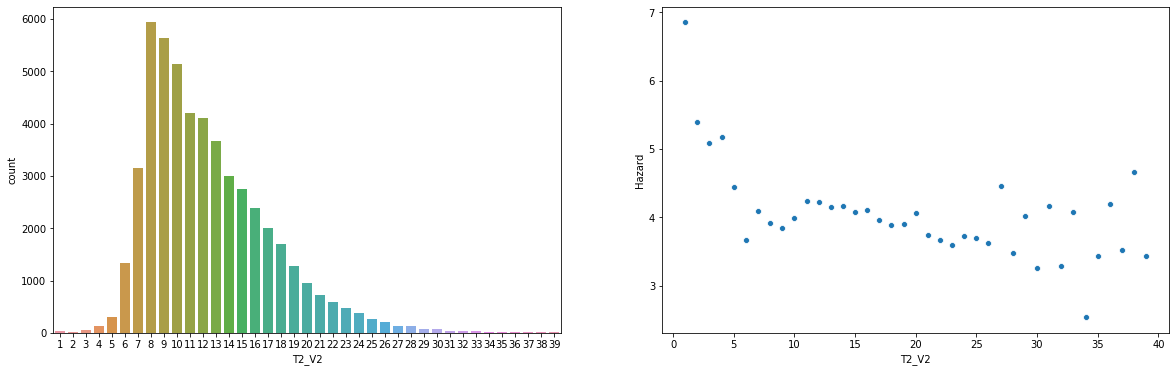

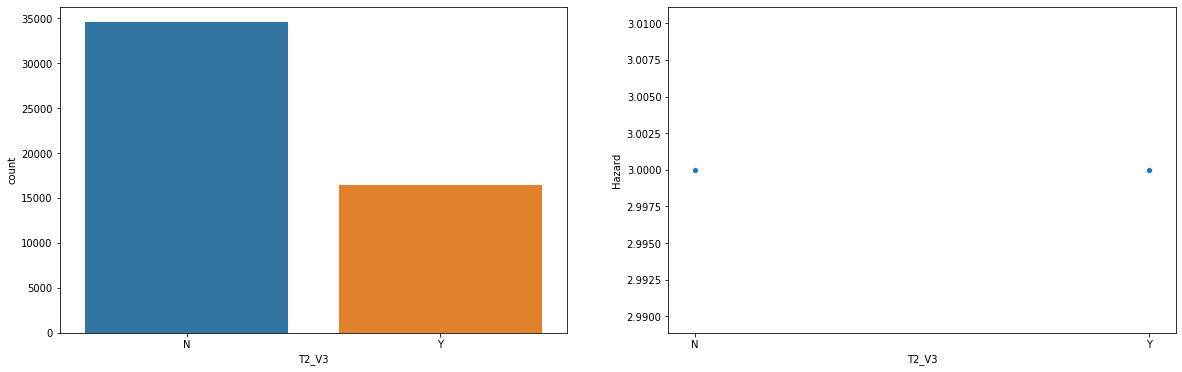

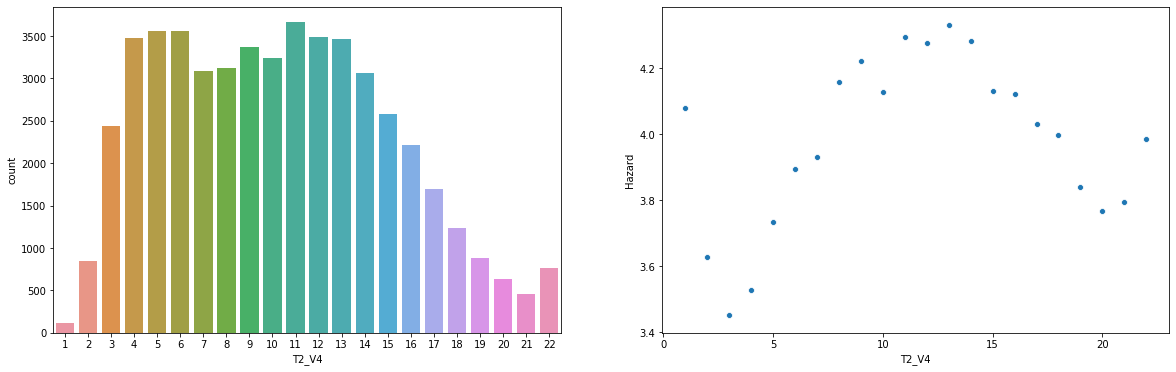

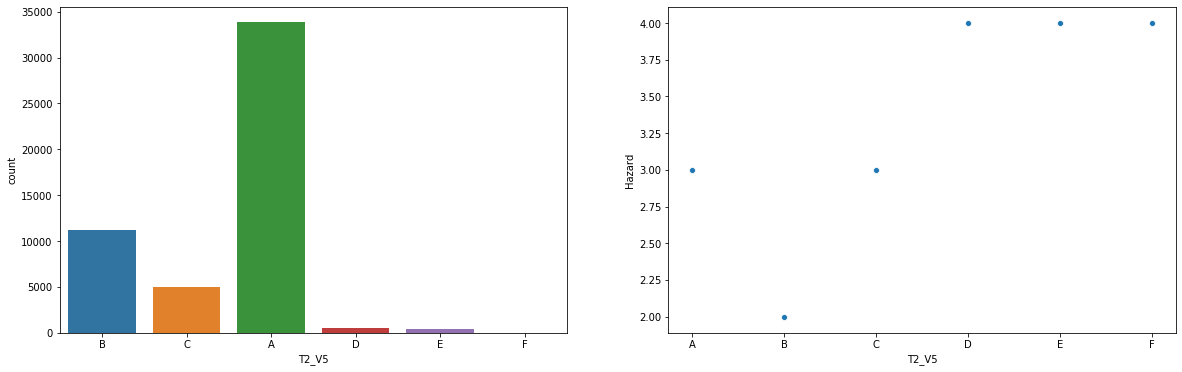

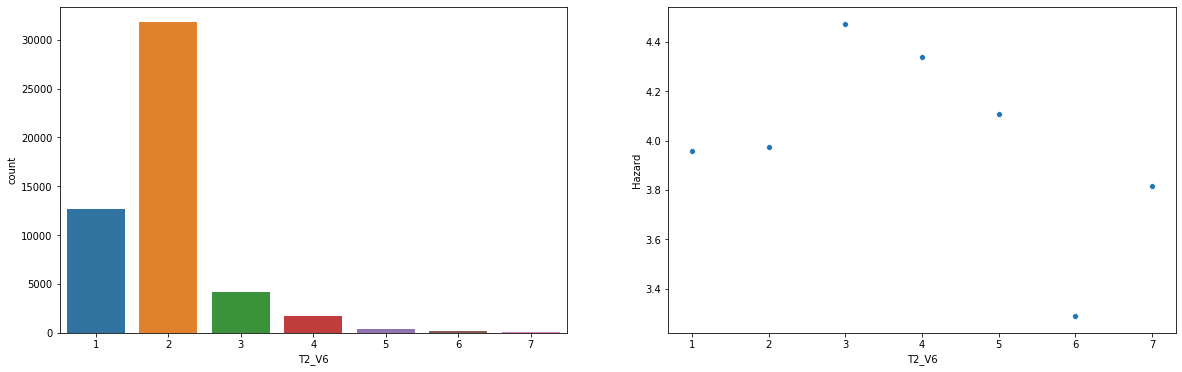

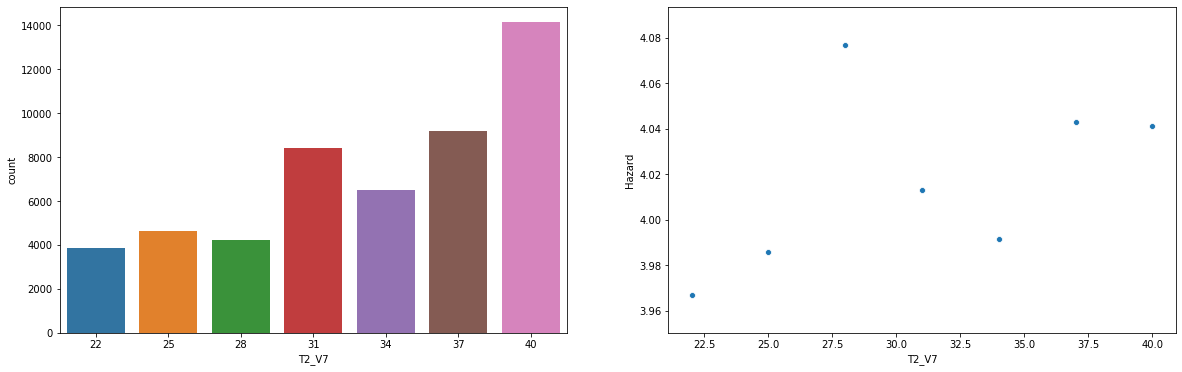

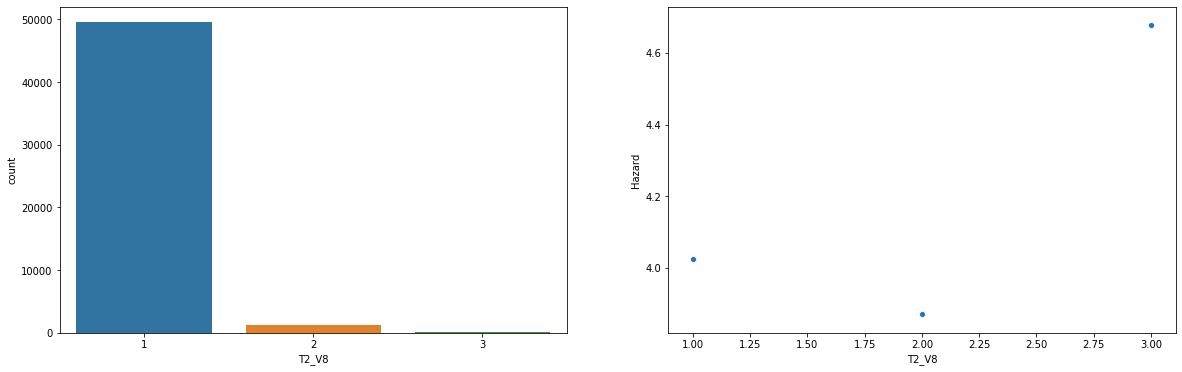

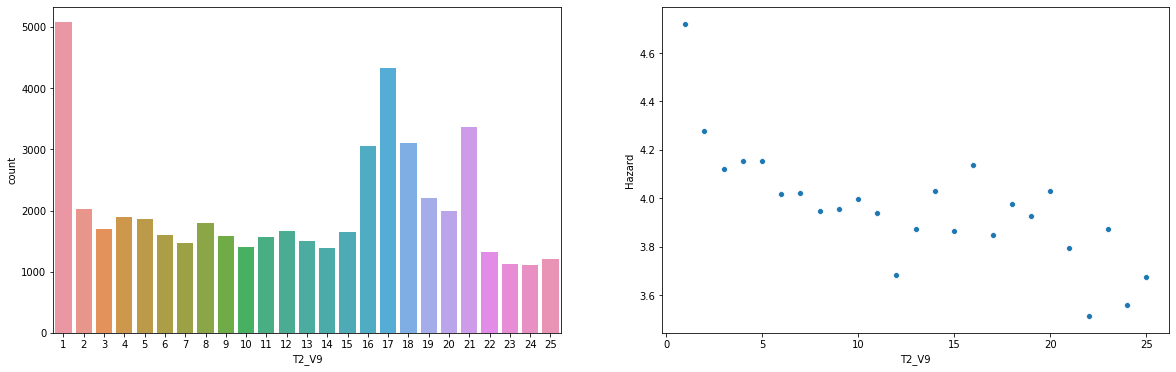

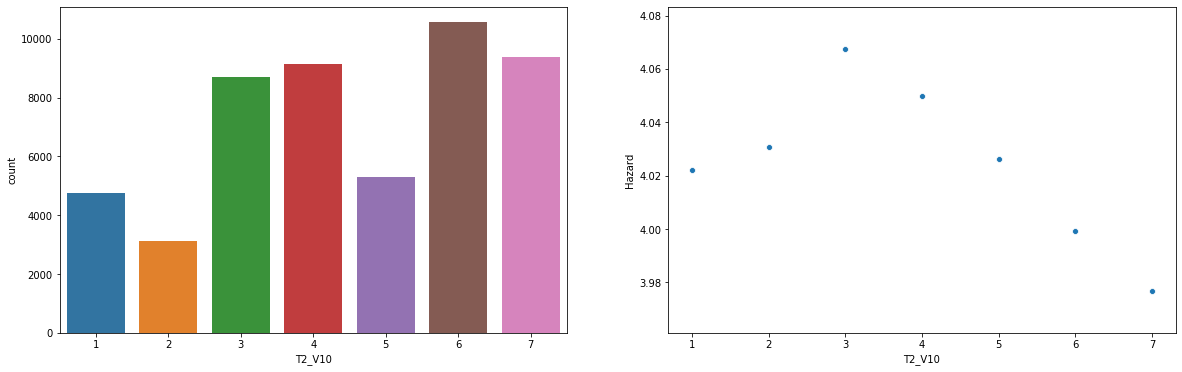

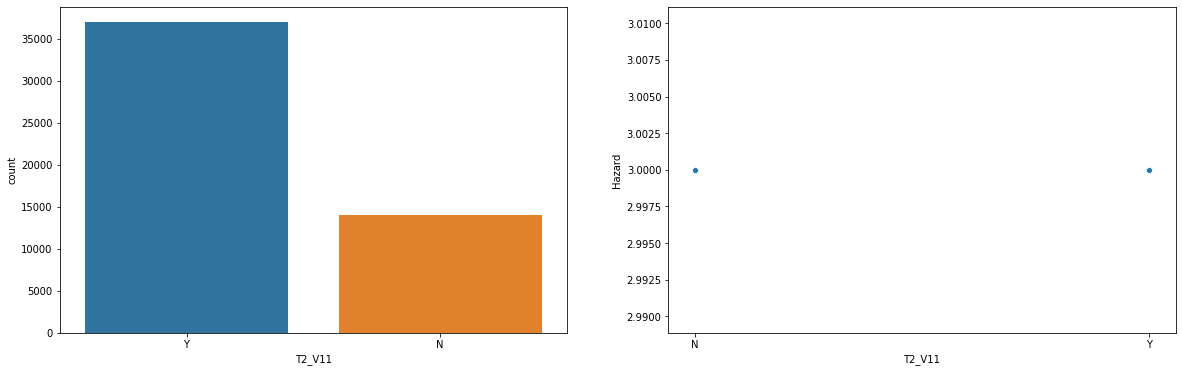

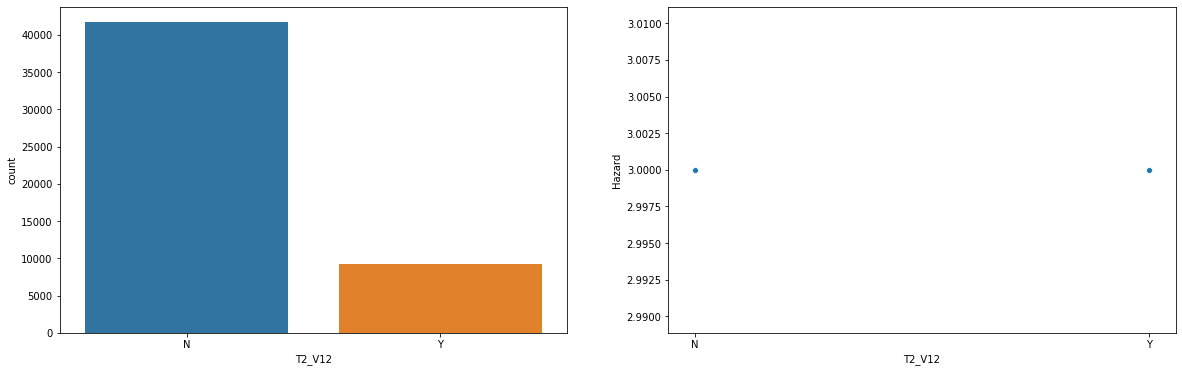

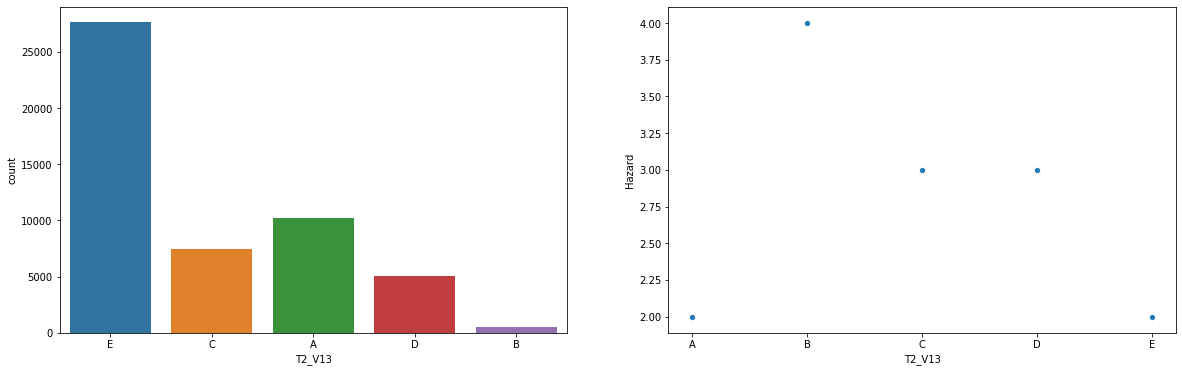

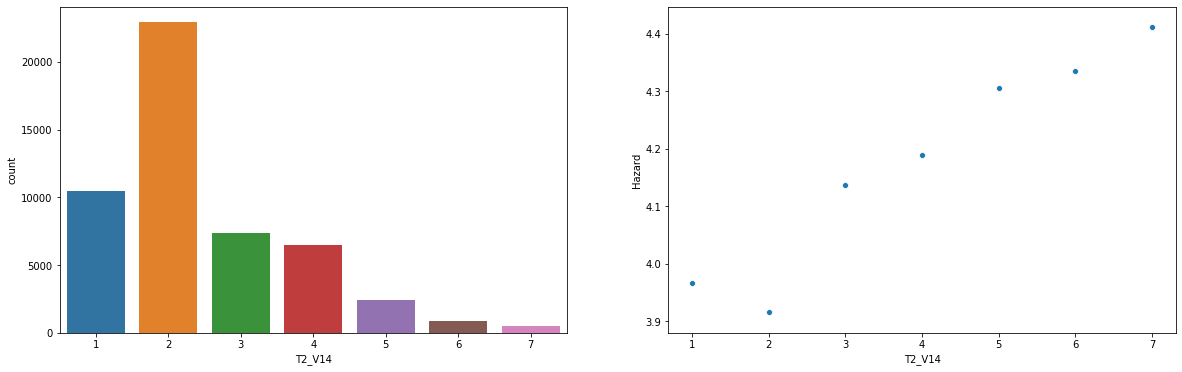

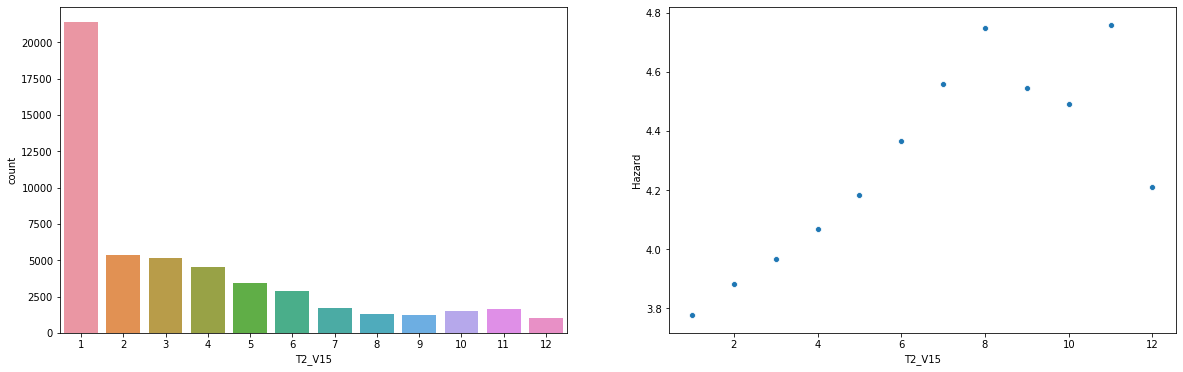

In [8]:
for i in data.columns:
    f,ax = plt.subplots(1,2,figsize=(20,6))
    sns.countplot(data[i],ax=ax[0])
    if i in data.select_dtypes(include=['object']).columns:
        sns.scatterplot(x=data.groupby(i)['Hazard'].median().index, y=data.groupby(i)['Hazard'].median(),ax=ax[1])
    else:
        sns.scatterplot(x=data.groupby(i)['Hazard'].mean().index, y=data.groupby(i)['Hazard'].mean(),ax=ax[1])
    plt.show()

1. As Hazard Score is continuous and can be seen the number of observations for each class is highly imbalanced, we will use regression in place of classifier.
2. All except 'T2_V1' feature are categorical variables. and would convert them to Dummies.
3. 'T2_V1' will be considered as continuous variable as it has values ranging from 1-100.

In [9]:
data.columns

Index(['Hazard', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6', 'T1_V7',
       'T1_V8', 'T1_V9', 'T1_V10', 'T1_V11', 'T1_V12', 'T1_V13', 'T1_V14',
       'T1_V15', 'T1_V16', 'T1_V17', 'T2_V1', 'T2_V2', 'T2_V3', 'T2_V4',
       'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V11',
       'T2_V12', 'T2_V13', 'T2_V14', 'T2_V15'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Hazard  50999 non-null  int64 
 1   T1_V1   50999 non-null  int64 
 2   T1_V2   50999 non-null  int64 
 3   T1_V3   50999 non-null  int64 
 4   T1_V4   50999 non-null  object
 5   T1_V5   50999 non-null  object
 6   T1_V6   50999 non-null  object
 7   T1_V7   50999 non-null  object
 8   T1_V8   50999 non-null  object
 9   T1_V9   50999 non-null  object
 10  T1_V10  50999 non-null  int64 
 11  T1_V11  50999 non-null  object
 12  T1_V12  50999 non-null  object
 13  T1_V13  50999 non-null  int64 
 14  T1_V14  50999 non-null  int64 
 15  T1_V15  50999 non-null  object
 16  T1_V16  50999 non-null  object
 17  T1_V17  50999 non-null  object
 18  T2_V1   50999 non-null  int64 
 19  T2_V2   50999 non-null  int64 
 20  T2_V3   50999 non-null  object
 21  T2_V4   50999 non-null  int64 
 22  T2_V5   50999 non-null

Dataset does not have any Null values.

In [11]:
data.describe()

,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
count,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000
mean,4.022785,9.722093,12.847585,3.186004,7.020451,13.996255,1.578521,57.580051,12.419616,10.259495,1.948215,33.487755,1.032236,12.493029,4.496520,2.451126,3.484480
std,4.021194,5.167943,6.255743,1.739369,3.595279,4.647499,0.862882,23.499818,4.783411,4.852008,0.800117,5.834038,0.195893,7.314788,1.896717,1.260074,3.076745
min,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,6.000000,7.000000,2.000000,3.000000,10.000000,1.000000,40.000000,9.000000,6.000000,2.000000,31.000000,1.000000,6.000000,3.000000,2.000000,1.000000
50%,3.000000,9.000000,14.000000,3.000000,8.000000,15.000000,1.000000,56.000000,11.000000,10.000000,2.000000,34.000000,1.000000,14.000000,4.000000,2.000000,2.000000
75%,5.000000,14.000000,18.000000,4.000000,8.000000,20.000000,2.000000,77.000000,15.000000,14.000000,2.000000,40.000000,1.000000,18.000000,6.000000,3.000000,5.000000
max,69.000000,19.000000,24.000000,9.000000,12.000000,20.000000,4.000000,100.000000,39.000000,22.000000,7.000000,40.000000,3.000000,25.000000,7.000000,7.000000,12.000000


In [12]:
datacat = data.drop(['T2_V1','Hazard'],axis=1)

In [13]:
datacat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1_V1   50999 non-null  int64 
 1   T1_V2   50999 non-null  int64 
 2   T1_V3   50999 non-null  int64 
 3   T1_V4   50999 non-null  object
 4   T1_V5   50999 non-null  object
 5   T1_V6   50999 non-null  object
 6   T1_V7   50999 non-null  object
 7   T1_V8   50999 non-null  object
 8   T1_V9   50999 non-null  object
 9   T1_V10  50999 non-null  int64 
 10  T1_V11  50999 non-null  object
 11  T1_V12  50999 non-null  object
 12  T1_V13  50999 non-null  int64 
 13  T1_V14  50999 non-null  int64 
 14  T1_V15  50999 non-null  object
 15  T1_V16  50999 non-null  object
 16  T1_V17  50999 non-null  object
 17  T2_V2   50999 non-null  int64 
 18  T2_V3   50999 non-null  object
 19  T2_V4   50999 non-null  int64 
 20  T2_V5   50999 non-null  object
 21  T2_V6   50999 non-null  int64 
 22  T2_V7   50999 non-null

In [14]:
datacat_dummies = datacat.copy()
cols = datacat_dummies.columns.tolist()
# print(cols)
dummies = pd.get_dummies(datacat_dummies)
datacat_dummies = pd.concat([datacat_dummies,dummies], axis=1)
datacat_dummies.drop(labels=cols,axis=1,inplace=True)
datacat_dummies.head()

,T1_V4_B,T1_V4_C,T1_V4_E,T1_V4_G,T1_V4_H,T1_V4_N,T1_V4_S,T1_V4_W,T1_V5_A,T1_V5_B,...,T2_V5_F,T2_V11_N,T2_V11_Y,T2_V12_N,T2_V12_Y,T2_V13_A,T2_V13_B,T2_V13_C,T2_V13_D,T2_V13_E
0,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [15]:
datacat_dummies = pd.concat([datacat_dummies,data[['T2_V1','Hazard']]], axis=1)
datacat_dummies.shape

(50999, 97)

In [16]:
m = list(datacat_dummies.columns)
n = list(filter(lambda t: t not in ['Hazard'], m))
print(m)
print(n)

['T1_V4_B', 'T1_V4_C', 'T1_V4_E', 'T1_V4_G', 'T1_V4_H', 'T1_V4_N', 'T1_V4_S', 'T1_V4_W', 'T1_V5_A', 'T1_V5_B', 'T1_V5_C', 'T1_V5_D', 'T1_V5_E', 'T1_V5_H', 'T1_V5_I', 'T1_V5_J', 'T1_V5_K', 'T1_V5_L', 'T1_V6_N', 'T1_V6_Y', 'T1_V7_A', 'T1_V7_B', 'T1_V7_C', 'T1_V7_D', 'T1_V8_A', 'T1_V8_B', 'T1_V8_C', 'T1_V8_D', 'T1_V9_B', 'T1_V9_C', 'T1_V9_D', 'T1_V9_E', 'T1_V9_F', 'T1_V9_G', 'T1_V11_A', 'T1_V11_B', 'T1_V11_D', 'T1_V11_E', 'T1_V11_F', 'T1_V11_H', 'T1_V11_I', 'T1_V11_J', 'T1_V11_K', 'T1_V11_L', 'T1_V11_M', 'T1_V11_N', 'T1_V12_A', 'T1_V12_B', 'T1_V12_C', 'T1_V12_D', 'T1_V15_A', 'T1_V15_C', 'T1_V15_D', 'T1_V15_F', 'T1_V15_H', 'T1_V15_N', 'T1_V15_S', 'T1_V15_W', 'T1_V16_A', 'T1_V16_B', 'T1_V16_C', 'T1_V16_D', 'T1_V16_E', 'T1_V16_F', 'T1_V16_G', 'T1_V16_H', 'T1_V16_I', 'T1_V16_J', 'T1_V16_K', 'T1_V16_L', 'T1_V16_M', 'T1_V16_N', 'T1_V16_O', 'T1_V16_P', 'T1_V16_Q', 'T1_V16_R', 'T1_V17_N', 'T1_V17_Y', 'T2_V3_N', 'T2_V3_Y', 'T2_V5_A', 'T2_V5_B', 'T2_V5_C', 'T2_V5_D', 'T2_V5_E', 'T2_V5_F', 'T2_V11_N

In [17]:
X = datacat_dummies[n]
X.head()

,T1_V4_B,T1_V4_C,T1_V4_E,T1_V4_G,T1_V4_H,T1_V4_N,T1_V4_S,T1_V4_W,T1_V5_A,T1_V5_B,...,T2_V11_N,T2_V11_Y,T2_V12_N,T2_V12_Y,T2_V13_A,T2_V13_B,T2_V13_C,T2_V13_D,T2_V13_E,T2_V1
0,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,1,36
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,78
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,71
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,71
4,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,75


In [18]:
y = datacat_dummies['Hazard']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [21]:
pd.DataFrame(X_train_sc).head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-0.569770,-0.322387,-0.234116,-0.112478,-0.111195,1.008016,-0.144282,-0.269484,-0.521982,-0.264972,...,-0.616391,0.616391,0.471550,-0.471550,-0.502153,-0.099505,-0.417318,3.015463,-1.086565,0.571800
1,-0.569770,-0.322387,-0.234116,-0.112478,-0.111195,1.008016,-0.144282,-0.269484,-0.521982,-0.264972,...,-0.616391,0.616391,-2.120667,2.120667,-0.502153,-0.099505,-0.417318,3.015463,-1.086565,0.358887
2,1.755093,-0.322387,-0.234116,-0.112478,-0.111195,-0.992048,-0.144282,-0.269484,1.915776,-0.264972,...,-0.616391,0.616391,0.471550,-0.471550,-0.502153,-0.099505,-0.417318,-0.331624,0.920331,1.125375
3,-0.569770,-0.322387,-0.234116,-0.112478,-0.111195,1.008016,-0.144282,-0.269484,-0.521982,-0.264972,...,-0.616391,0.616391,0.471550,-0.471550,-0.502153,-0.099505,-0.417318,-0.331624,0.920331,-0.620515
4,1.755093,-0.322387,-0.234116,-0.112478,-0.111195,-0.992048,-0.144282,-0.269484,-0.521982,-0.264972,...,-0.616391,0.616391,0.471550,-0.471550,-0.502153,-0.099505,-0.417318,3.015463,-1.086565,-0.620515


# Checking Simple Linear Regression based predictions.

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
start_time = time.time()
fit1 = lr.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

0.14098000526428223


In [23]:
y_pred = fit1.predict(X_test_sc)
act_vs_pred = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred,columns=['Pred_Hazard'],index=act_vs_pred.index)
act_vs_pred = pd.concat([act_vs_pred,y_pred], axis=1)
act_vs_pred['Pred_Hazard'] = round(act_vs_pred['Pred_Hazard'])

In [24]:
print(act_vs_pred)


       Hazard  Pred_Hazard
17853       1          2.0
21127       8          2.0
37066       4          4.0
3675        4          2.0
18561       7          3.0
...       ...          ...
41140       1          2.0
2067        1          3.0
15291       1          5.0
20949       1          5.0
2415        1          4.0

[15300 rows x 2 columns]


In [25]:
from sklearn import metrics

In [26]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("RMSE Score for the linear regression based predictions : {}".format(rmse))

RMSE Score for the linear regression based predictions : 3.8654195235406683


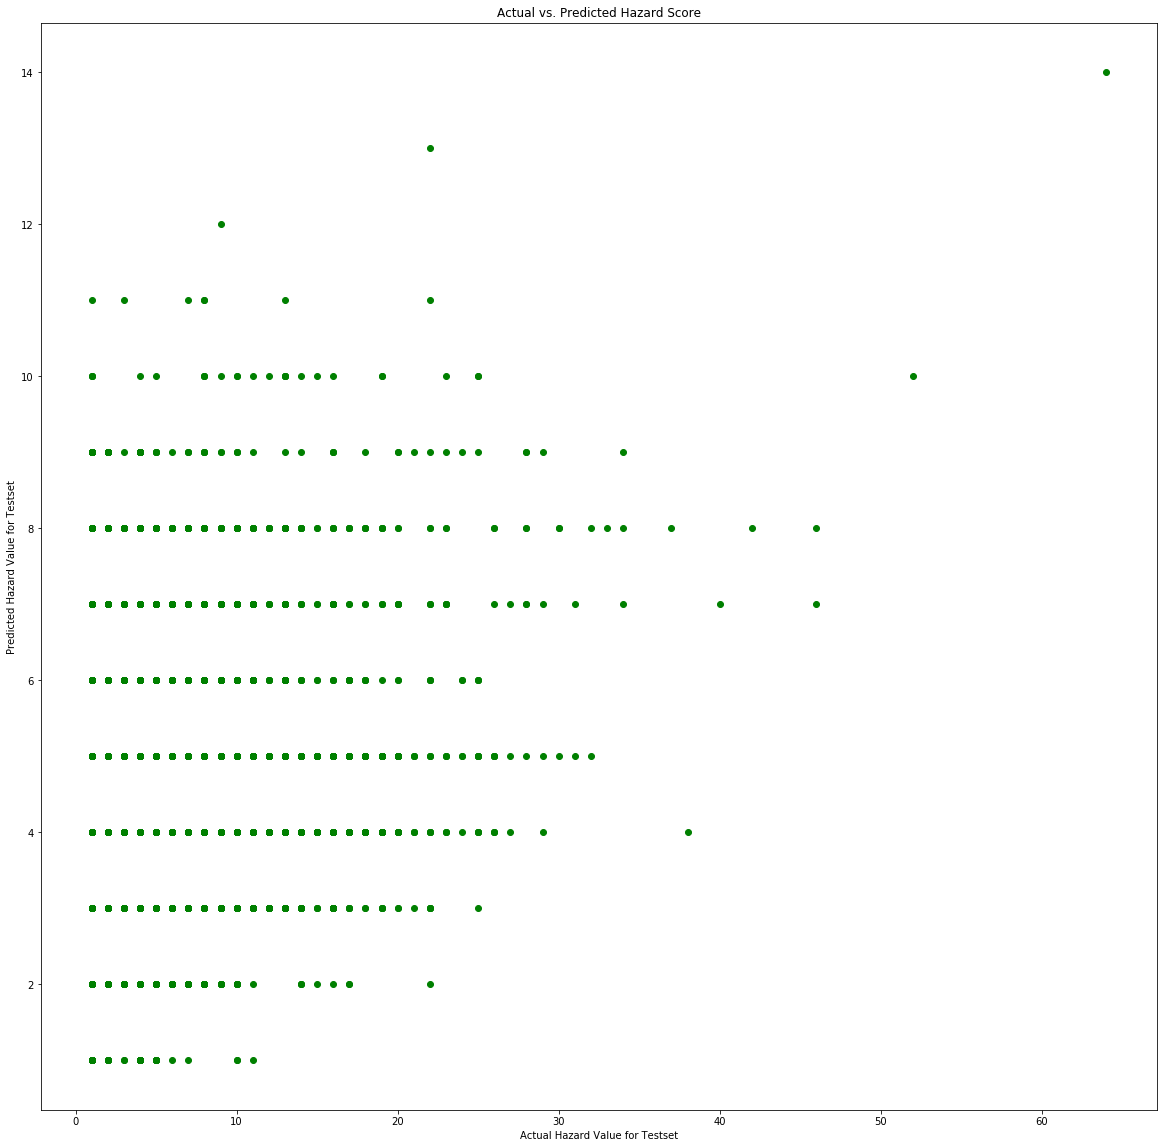

In [27]:
plt.figure(figsize=(20,20))
plt.scatter(y=act_vs_pred[['Pred_Hazard']], 
            x=act_vs_pred[['Hazard']], 
            c='GREEN')
# plt.scatter(y=act_vs_pred[['Pred_Hazard']], x=act_vs_pred.index, c='RED')
plt.xlabel("Actual Hazard Value for Testset")
plt.ylabel("Predicted Hazard Value for Testset")
plt.title("Actual vs. Predicted Hazard Score")
plt.show()

From the above scatter plot it can be see that the predictions are way off and limited to max of 14 where as actual values range from 1 - 64. Thus regression does not seem to help much with the given dataset. 

Also as there as too many classes for Hazard score, we can bin them in fewer bins for prediction 
For this we will bin Hazard score in following. To balance the classes we will need unevan bins. based on the frequency plot for hazard score above.

1. Hazard Score 0 - 3 =  Very Low 
2. Hazard Score 4 - 6 = Low
3. Hazard Score 7 - 15 = Moderate
4. Hazard Score 16 and above = High


In [28]:
# Getting Binned Y for both Test and Train

bins = [0, 3, 6, 15, 100]
labels = ['Very_Low', 'Low', 'Moderate', 'High']
print("* Bins for Test data \n{} \n".format(pd.cut(y_test, bins=bins, labels=labels).value_counts()))

print("* Bins for Train data \n{} \n".format(pd.cut(y_train, bins=bins, labels=labels).value_counts()))

y_test = pd.cut(y_test, bins=bins, labels=labels)
y_train = pd.cut(y_train, bins=bins, labels=labels)

* Bins for Test data 
Very_Low    8033
Low         4133
Moderate    2802
High         332
Name: Hazard, dtype: int64 

* Bins for Train data 
Very_Low    19118
Low          9192
Moderate     6617
High          772
Name: Hazard, dtype: int64 



As can be seen there is high class imbalance for binned data thus we will try to balance this by adding duplicates for claases with low frequency.

We will use SMOTE to generate additional samples for Train Data using the oversampling technique.

In [29]:
#!pip install -U imbalanced-learn

In [30]:
from imblearn.over_sampling import SMOTE
samplingStrat = {'Very_Low': 19118, 'Low': 19118, 'Moderate': 19118, 'High': 19118 }
sm = SMOTE(random_state=0, sampling_strategy=samplingStrat, k_neighbors=10)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [31]:
X_train.shape

(76472, 96)

Lets try reduce the features using the LDA.

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

(76472, 3)
(15300, 3)


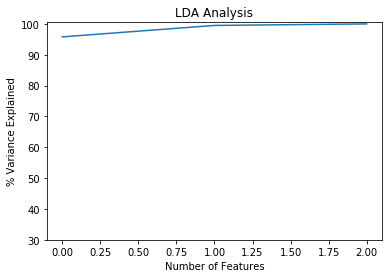

In [33]:
lda = LDA(n_components = 3)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
print(X_train.shape)
print(X_test.shape)
var=np.cumsum(np.round(lda.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('LDA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

### Now that the train dataset is balanced and features are reduced lets work on identifying the best model for this dataset.

In [34]:
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
import xgboost as xgb
import lightgbm as lgb
import itertools
from sklearn.calibration import CalibratedClassifierCV

import warnings
warnings.filterwarnings("ignore")

In [35]:
dt = DecisionTreeClassifier()

In [36]:
sgd = CalibratedClassifierCV(SGDClassifier())

In [37]:
pac = CalibratedClassifierCV(PassiveAggressiveClassifier())

In [38]:
NB = GaussianNB()

In [39]:
RF =  RandomForestClassifier()

In [40]:
gb = GradientBoostingClassifier()

In [41]:
xg = xgb.XGBClassifier()

In [42]:
lgbm = lgb.LGBMClassifier()

In [43]:
models = {"DecisionTreeClassifier": dt,
          "SGDClassifier" : sgd, 
          "PassiveAggressiveClassifier": pac, 
          "GaussianNB": NB,
          "RandomForestClassifier": RF,
          "GradientBoostingClassifier": gb,
          "XGBClassifier": xg,
          "LGBMClassifier": lgbm}

In [44]:
# Function to evaluate the Model

def evaluate_model(model, X_test, y_test, classes):
    p_test = model.predict_proba(X_test)
    y_test_pred = model.predict(X_test)
    cfs = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cfs, classes=classes,
                          title='Confusion matrix')
    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average="macro")
    rec = recall_score(y_test, y_test_pred, average="macro")
    print("Classifier Name : {}".format(model.__class__.__name__))
    print("Accuracy: %3.5f, Precision: %3.5f, Recall: %3.5f" % (acc, prec, rec))

In [45]:
#Function to plot the confusion Matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(-0.5,len(classes)+0.5,step=1)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=45)

    #print(cm)

#     thresh = cm.max() / 2.
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [46]:
#Validation function
n_folds = 5

def accuracy_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    accuracy = cross_val_score(model, X_train, y_train, scoring="accuracy", cv = kf)
    return(accuracy)

In [47]:


for model in models:
    print("------------------------------{}-----------------------------\n".format(model))
    mod = models[model]
    score = accuracy_cv(mod)
    print("{} Train Accuracy score: {:.4f} ({:.4f})\n".format(model, score.mean(), score.std()))
    


------------------------------DecisionTreeClassifier-----------------------------

DecisionTreeClassifier Train Accuracy score: 0.5762 (0.0716)

------------------------------SGDClassifier-----------------------------

SGDClassifier Train Accuracy score: 0.5246 (0.0504)

------------------------------PassiveAggressiveClassifier-----------------------------

PassiveAggressiveClassifier Train Accuracy score: 0.5148 (0.0455)

------------------------------GaussianNB-----------------------------

GaussianNB Train Accuracy score: 0.5600 (0.0814)

------------------------------RandomForestClassifier-----------------------------

RandomForestClassifier Train Accuracy score: 0.6168 (0.0945)

------------------------------GradientBoostingClassifier-----------------------------

GradientBoostingClassifier Train Accuracy score: 0.5796 (0.1010)

------------------------------XGBClassifier-----------------------------

XGBClassifier Train Accuracy score: 0.5967 (0.1046)

---------------------------

------------------------------DecisionTreeClassifier-----------------------------



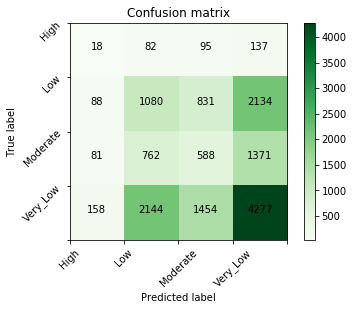

Classifier Name : DecisionTreeClassifier
Accuracy: 0.38974, Precision: 0.26397, Recall: 0.26445
------------------------------SGDClassifier-----------------------------



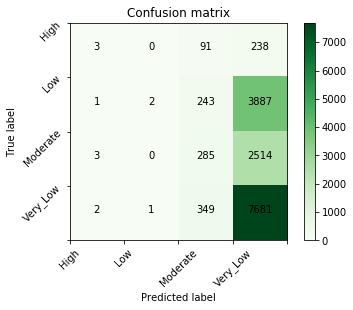

Classifier Name : CalibratedClassifierCV
Accuracy: 0.52098, Precision: 0.45770, Recall: 0.26685
------------------------------PassiveAggressiveClassifier-----------------------------



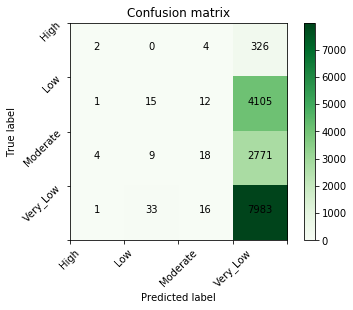

Classifier Name : CalibratedClassifierCV
Accuracy: 0.52405, Precision: 0.34972, Recall: 0.25246
------------------------------GaussianNB-----------------------------



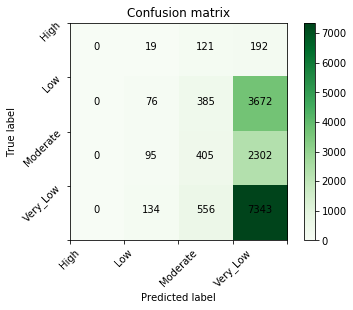

Classifier Name : GaussianNB
Accuracy: 0.51137, Precision: 0.26355, Recall: 0.26926
------------------------------RandomForestClassifier-----------------------------



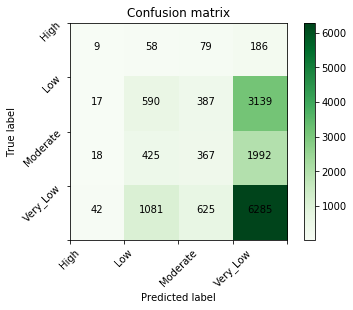

Classifier Name : RandomForestClassifier
Accuracy: 0.47392, Precision: 0.29300, Recall: 0.27081
------------------------------GradientBoostingClassifier-----------------------------



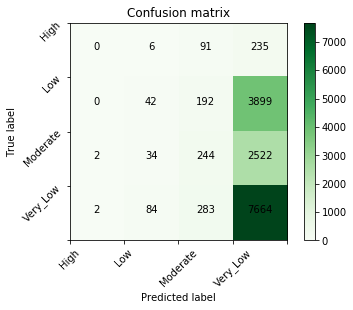

Classifier Name : GradientBoostingClassifier
Accuracy: 0.51961, Precision: 0.27236, Recall: 0.26283
------------------------------XGBClassifier-----------------------------



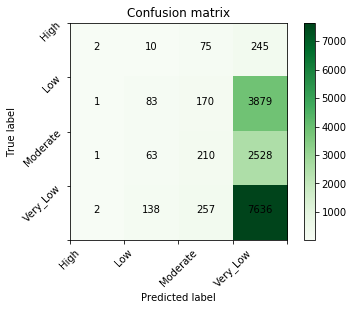

Classifier Name : XGBClassifier
Accuracy: 0.51837, Precision: 0.36126, Recall: 0.26291
------------------------------LGBMClassifier-----------------------------



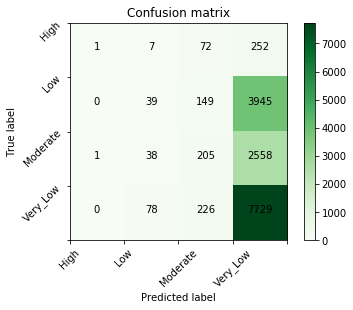

Classifier Name : LGBMClassifier
Accuracy: 0.52118, Precision: 0.39720, Recall: 0.26194


In [48]:
for model in models:
    print("------------------------------{}-----------------------------\n".format(model))
    mod = models[model]
    fit = mod.fit(X_train, y_train)
    classes = fit.classes_
    evaluate_model(fit, X_test, y_test, classes)
    

#### Stacking Averaged models

In [98]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5, use_features_in_secondary=False):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        self.use_features_in_secondary = use_features_in_secondary
        
    def fit(self, X, y):
        """Fit all the models on the given dataset"""
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        # Train cloned base models and create out-of-fold predictions
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        print(out_of_fold_predictions)
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                print(y_pred)
                out_of_fold_predictions[holdout_index, i] = y_pred
        
        if self.use_features_in_secondary:
            self.meta_model_.fit(np.hstack((X, out_of_fold_predictions)), y)
        else:
            self.meta_model_.fit(out_of_fold_predictions, y)
            
        return self
    
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        if self.use_features_in_secondary:
            return self.meta_model_.predict(np.hstack((X, meta_features)))
        else:
            return self.meta_model_.predict(meta_features)

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = pd.DataFrame(np.zeros((X.shape[0], len(self.base_models))))
        print(out_of_fold_predictions.shape)
        for i, model in enumerate(self.base_models):
            f = 0
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
#                 print(y_pred.size)
                print("y_pred type is {} AND holdout_index type is {}"
                      .format(np.array(y_pred), np.array(holdout_index)))
                out_of_fold_predictions[holdout_index, i] = y_pred
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    
    def getMaxFreq(self, A):
        unique,pos = np.unique(A,return_inverse=True,axis=1)
        counts = np.bincount(pos)
        maxpos = counts.argmax()
        return unique[maxpos]
        
    def getMaxFreq_df(self, A):
        print(A)
        print(A.shape)
        df = pd.DataFrame({'data' : A})
        print(df.head())
        
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):        
        print(np.column_stack([self.getMaxFreq_df(np.column_stack([model.predict(X) for model in base_models]))
            for base_models in self.base_models_ ]))
#         meta_features = np.column_stack([self.getMaxFreq(np.column_stack([model.predict(X) for model in base_models])) for base_models in self.base_models_ ])
#         return self.meta_model_.predict(meta_features)



In [99]:
# model_list=[NB, RF, gb, xg, lgbm]

model_list=[NB, RF]

In [100]:
stacked_averaged_models = StackingAveragedModels(base_models = model_list, meta_model = dt)
stacked_averaged_models.fit(X_train, y_train)

AttributeError: module 'numpy' has no attribute 'nulls'

In [ ]:
y_pred_stacked = stacked_averaged_models.predict(X_test)

In [ ]:
score = accuracy_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))